In [153]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [154]:
# Exp 1- 8 as per executed in labs Inputs will be varied practicals hard coded , some with tensorflow and keras CNN, rnn, autoencoder and backpropogation can be implemented on datasets mostly mnist, iris, catand dog Sometimes u need to take inputs of dataset by creating shapes So there are variations while taking inputs Instructions while coming to the lab.

## Experiment 1

In [155]:
# Experiment 1: Perceptron Learning Algorithm

def bipolar(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

def unipolar(net):
    if net < 0:
        return 0
    else:
        return 1

def process(x, d, w1, w2, b, activation, delta_b, c=1):
    net = w1*x[0] + w2*x[1] + b
    fnet = activation(net)
    error = d - fnet
    del_w1 = c * error * x[0]
    del_w2 = c * error * x[1]
    del_b = error
    delta_b.append(del_b)
    w1 += del_w1
    w2 += del_w2
    b += del_b
    return w1, w2, b, delta_b

x = [[0, 0], 
     [1, 0],
     [0, 1],
     [1, 1]]
d = [0, 0, 0, 1]
w1, w2, b = 0, 0, 0
epoch = 0
delta_b = []
while delta_b != [0, 0, 0, 0]:
    epoch += 1
    delta_b = []
    for i in range(len(x)):
        w1, w2, b, delta_b = process(x[i], d[i], w1, w2, b, unipolar, delta_b)

    print("Epoch: ", epoch, "Delta_b: ", delta_b, "Final Weights: ", [w1, w2], "Final Bias: ", b)

Epoch:  1 Delta_b:  [-1, 0, 0, 1] Final Weights:  [1, 1] Final Bias:  0
Epoch:  2 Delta_b:  [-1, -1, 0, 1] Final Weights:  [1, 2] Final Bias:  -1
Epoch:  3 Delta_b:  [0, -1, -1, 1] Final Weights:  [1, 2] Final Bias:  -2
Epoch:  4 Delta_b:  [0, 0, -1, 1] Final Weights:  [2, 2] Final Bias:  -2
Epoch:  5 Delta_b:  [0, -1, 0, 0] Final Weights:  [1, 2] Final Bias:  -3
Epoch:  6 Delta_b:  [0, 0, 0, 0] Final Weights:  [1, 2] Final Bias:  -3


## Experiment 2

In [156]:
# Experiment 2: Packpropagation Algorithm
# Forward and Backward Pass

# 0 - 0 - 0
# 0 - 0 - 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(input, weight, bias, activation):
    layer = np.dot(weight, input) + bias
    return float(activation(layer)[0])

def error_calculation(excepted_output, output):
    return 0.5 * np.sum((excepted_output - output) ** 2)

def update_weights_inner(output, target, hidden, input, weight_affecting, weight_i, learning_rate):
    error_i_1 = (output[0] - target[0]) * (output[0] * (1 - output[0])) * weight_affecting[0] * (hidden[0] * (1 - hidden[0])) * input
    error_i_2 = (output[1] - target[1]) * (output[1] * (1 - output[1])) * weight_affecting[1] * (hidden[0] * (1 - hidden[0])) * input
    error_i = error_i_1 + error_i_2
    weight = weight_i - learning_rate * error_i
    return weight

def update_weights_outer(output, target, input, weight_i, learning_rate):
    error_i = (output - target) * (output * (1 - output)) * input
    weight = weight_i - learning_rate * error_i
    return weight

def backward_pass(weights, biases, inputs, hidden, excepted_output, output):
    w5 = update_weights_outer(output[0], excepted_output[0], hidden[0], weights[4], 0.6)
    w6 = update_weights_outer(output[0], excepted_output[0], hidden[1], weights[5], 0.6)
    w7 = update_weights_outer(output[1], excepted_output[1], hidden[1], weights[6], 0.6)
    w8 = update_weights_outer(output[0], excepted_output[0], hidden[1], weights[7], 0.6)

    w1 = update_weights_inner(output, excepted_output, hidden, inputs[0], [weights[4], weights[6]], weights[0], 0.6)
    w2 = update_weights_inner(output, excepted_output, hidden, inputs[1], [weights[5], weights[7]], weights[2], 0.6)
    w3 = update_weights_inner(output, excepted_output, hidden, inputs[0], [weights[4], weights[6]], weights[1], 0.6)
    w4 = update_weights_inner(output, excepted_output, hidden, inputs[1], [weights[5], weights[7]], weights[3], 0.6)

    return np.array([w1, w2, w3, w4, w5, w6, w7, w8])

inputs = [0.1, 0.5]
weights = [0.1, 0.3, 0.2, 0.4 , 0.5, 0.6, 0.7, 0.8]
biases = [0.25, 0.25, 0.35, 0.35]
excepted_output = [0.05, 0.95]
total_error = 1
err = 1
epochs = 47000

for i in range(epochs):
    hidden_network1 = forward_pass(inputs, weights[:2], biases[:1], sigmoid)
    hidden_network2 = forward_pass(inputs, weights[2:4], biases[1:2], sigmoid)
    hidden = [hidden_network1, hidden_network2]
    output_network1 = forward_pass(hidden, weights[4:6], biases[2:3], sigmoid)
    output_network2 = forward_pass(hidden, weights[6:8], biases[3:4], sigmoid)
    output = [output_network1, output_network2]

    error = error_calculation(np.array(excepted_output), np.array(output))
    total_error += error
    updated_weights = backward_pass(weights, biases, inputs, hidden, excepted_output, output)
    weights = updated_weights
    if i % 100 == 0:
        print(f"Epoch {i}: Error: {error}")
    if error < 0.01:
        print(f"Final Epoch {i}: Error: {error}")
        break
print("Final Output: ", output)
print("Final Weights: ", weights)
print("Final Error: ", error)

Epoch 0: Error: 0.24908954146037615
Epoch 100: Error: 0.028231178806456897
Epoch 200: Error: 0.010854298345440548
Final Epoch 212: Error: 0.009934499706295596
Final Output:  [0.11334917074274482, 0.8240798587246752]
Final Weights:  [ 0.43120006  0.23893404  0.32178347  0.12951745 -2.03407275 -1.99635792
  3.67343078 -1.79635792]
Final Error:  0.009934499706295596


## Experiment 3

Input Image: 
 [[206 239  37 228  53  73 198 211  14]
 [152 120  29  57  85 151 184 161 240]
 [127 201  18 112 180 248  61  59 210]
 [110 142 136 139 173 214  36  44  30]
 [ 58  40 170  17 212 135 143 250  22]
 [245 189  55   4 202 235 225 129 121]
 [ 92 232  97 232 204 189 234 182  47]
 [222  79  12 156  60  61   3 245 104]
 [  1 170  43 220  41  83 228 216 145]]
Kernel: 
 [[ 1  3  1]
 [ 2  0  0]
 [-1  1 -2]]


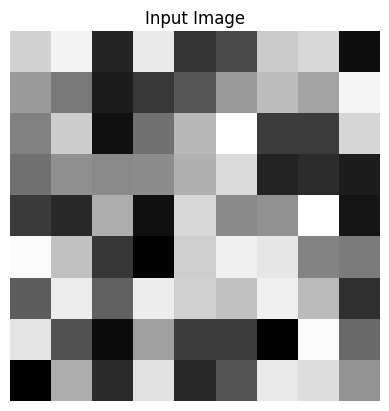

Convolution Output: 
 [[1302  411  566  146  586  875  791]
 [ 555  382    0  293 1051 1094  977]
 [ 610  747  229 1103  968  426  583]
 [ 622  627  611  634  858  368  146]
 [ 784  346  270  390  681  965 1219]
 [ 884  443  487 1091 1535  869 1235]
 [1412  346 1116 1000  711  908  531]]


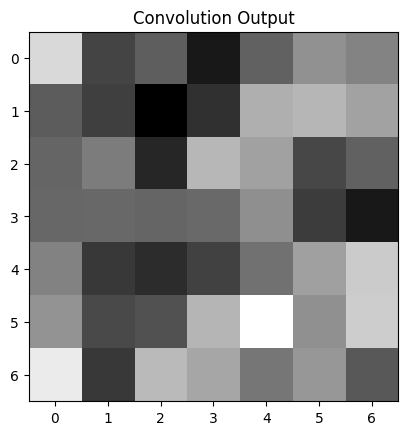

Max Pooling Output: 
 [[1302  566  566 1051 1094 1094]
 [ 747  747 1103 1103 1094 1094]
 [ 747  747 1103 1103  968  583]
 [ 784  627  634  858  965 1219]
 [ 884  487 1091 1535 1535 1235]
 [1412 1116 1116 1535 1535 1235]]


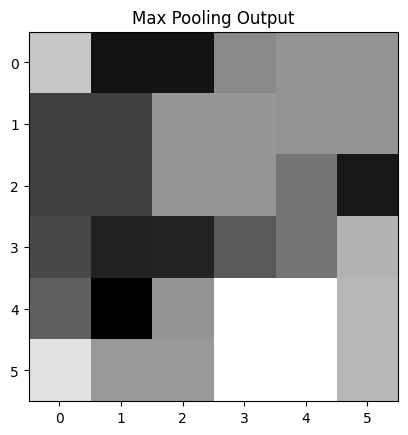

Flatten Output: 
 [1302  566  566 1051 1094 1094  747  747 1103 1103 1094 1094  747  747
 1103 1103  968  583  784  627  634  858  965 1219  884  487 1091 1535
 1535 1235 1412 1116 1116 1535 1535 1235]


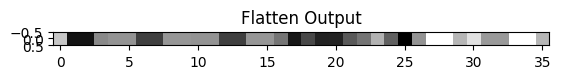

Dense Layer Output: 
 [17135.17406468]


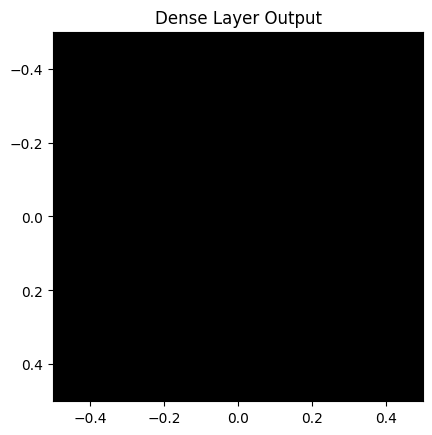

sigmoid Output:  [1.]


In [157]:
# Experiment 3: CNN

def convolve2d(image, kernel, stride):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.int32)
    for x in range(0, output_width):
        for y in range(0, output_height):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.int32)
    return new_image

def maxpooling(input, pool_size, stride):
    input_height, input_width = input.shape
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1
    new_image = np.zeros((output_height, output_width)).astype(np.int32)
    for i in range(output_height):
        for j in range(output_width):
            new_image[i, j] = np.max(input[i:i + pool_size, j:j + pool_size])
    return new_image.astype(np.int32)


def flatten(input):
    return input.flatten()

def dense(input, weights, bias):
    return np.dot(weights, input) + bias

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def train_cnn(input, kernel, pool_size, stride):
    conv_output = convolve2d(input, kernel, stride)
    relu_output = relu(conv_output)
    print("Convolution Output: \n", relu_output)
    plt.imshow(relu_output, cmap='gray')
    plt.title("Convolution Output")
    plt.show()

    pool_output = maxpooling(relu_output, pool_size, stride)
    print("Max Pooling Output: \n", pool_output)
    plt.imshow(pool_output, cmap='gray')
    plt.title("Max Pooling Output")
    plt.show()

    flatten_output = flatten(pool_output)
    print("Flatten Output: \n", flatten_output)
    plt.imshow(flatten_output.reshape(1, -1), cmap='gray')
    plt.title("Flatten Output")
    plt.show()

    weights = np.random.rand(flatten_output.size)
    bias = np.random.rand(1)
    dense_output = dense(flatten_output, weights, bias)
    print("Dense Layer Output: \n", dense_output)
    plt.imshow(dense_output.reshape(1, -1), cmap='gray')
    plt.title("Dense Layer Output")
    plt.show()

    sigmoid_output = sigmoid(dense_output)
    return sigmoid_output
pool_size = 2
stride = 1
input = np.random.randint(0, 255, (9, 9)).astype(np.int32)
kernel = np.array([[1, 3, 1], 
                   [2, 0, 0], 
                   [-1, 1, -2]])
# [[-1, 0, 1],
#  [-1, 0, 1],
#  [-1, 0 ,1]]
print("Input Image: \n", input)
print("Kernel: \n", kernel)
plt.imshow(input, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()
sigmoid_output = train_cnn(input, kernel, pool_size, stride)
print("sigmoid Output: ", sigmoid_output)


In [158]:
# Load MNIST dataset
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9048 - loss: 0.3342 - val_accuracy: 0.9787 - val_loss: 0.0683
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9828 - loss: 0.0572 - val_accuracy: 0.9815 - val_loss: 0.0609
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9901 - loss: 0.0326 - val_accuracy: 0.9844 - val_loss: 0.0518
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9843 - val_loss: 0.0594
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9843 - val_loss: 0.0599
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9822 - loss: 0.0603
Test accuracy: 0.9843999743461609


In [159]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_235 (Dense)               │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_236 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [160]:
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
print("Predicted classes: ", predicted_classes)
print("True classes: ", y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Predicted classes:  [7 2 1 ... 4 5 6]
True classes:  [7 2 1 ... 4 5 6]


## Experiment 4

In [161]:
# Experiment 4: RNN

input_sentences = [
    "I love programming",
    "Python is great",
    "I enjoy learning new things",
    "TensorFlow is a powerful library",
    "Deep learning is fascinating"
]

def one_hot_encode(sentences):
    tokens = [word_tokenize(sentence.lower()) for sentence in sentences]
    vocab = set(word for sentence in tokens for word in sentence)
    print(len(vocab))
    word_to_index = {word: i for i, word in enumerate(vocab)}
    encoded = []
    for sentence in tokens:
        encoded_sentence = np.zeros(len(vocab))
        for word in sentence:
            encoded_sentence[word_to_index[word]] = 1
        encoded.append(encoded_sentence)
    return np.array(encoded)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SimpleRNN(input):
    embeddings = one_hot_encode(input)

    input_size = embeddings.shape[1]
    hidden_size = 20
    output_size = 1
    weights_input = np.random.rand(input_size, hidden_size)
    weights_hidden = np.random.rand(hidden_size, hidden_size)
    weights_output = np.random.rand(hidden_size, output_size)
    biases_hidden = np.random.rand(hidden_size)
    biases_output = np.random.rand(output_size)
    hidden_state = np.zeros(hidden_size)
    outputs = []

    for t in embeddings:
        hidden_state = np.tanh(np.dot(t, weights_input) + np.dot(hidden_state, weights_hidden) + biases_hidden)
        output = sigmoid(np.dot(hidden_state, weights_output) + biases_output)
        outputs.append(output)
    return np.array(outputs)

rnn_output = SimpleRNN(input_sentences)
print("RNN Output: \n", rnn_output)

16
RNN Output: 
 [[0.99988777]
 [0.99993262]
 [0.99993262]
 [0.99993262]
 [0.99993262]]


In [162]:
from keras.datasets import imdb
from keras.preprocessing import sequence

data = imdb.load_data(num_words=1000)
(x_train, y_train),(x_test, y_test) = data

model = Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.5083 - loss: 0.7003 - val_accuracy: 0.6748 - val_loss: 0.6086
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.5960 - loss: 0.6620 - val_accuracy: 0.6744 - val_loss: 0.6056
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6764 - loss: 0.5997 - val_accuracy: 0.7164 - val_loss: 0.5651
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7018 - loss: 0.5798 - val_accuracy: 0.7364 - val_loss: 0.5490
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7310 - loss: 0.5383 - val_accuracy: 0.5634 - val_loss: 0.6661
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5602 - loss: 0.6660
Test accuracy: 0.5667999982833862


In [163]:
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
print("Predicted classes: ", predicted_classes)
print("True classes: ", y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
Predicted classes:  [0 1 0 ... 1 0 1]
True classes:  [0 1 1 ... 0 0 0]


## Experiment 5

In [164]:
import numpy as np
x = np.array([0.2, 0.4])
w = np.array([[0.1,0.4],[0.2,0.6],[0.3,0.2],[0.4, 0.5]])
a = 0.2
num_epochs = 1

for epoch in range(1, num_epochs+1):

  d = np.sum((w-x)**2, axis = 1)
  bmu = np.argmin(d)
  bmu_d = d[bmu]
  w[bmu] += a * (x - w[bmu])
  a *= 0.5

  print(f"Epoch {epoch}: BMU = Y{bmu+1}, Distance = {bmu_d}")
  print(f"Weights: \n{w}\n")

Epoch 1: BMU = Y1, Distance = 0.010000000000000002
Weights: 
[[0.12 0.4 ]
 [0.2  0.6 ]
 [0.3  0.2 ]
 [0.4  0.5 ]]



## Experiment 6

In [165]:
from sklearn.decomposition import PCA

def circle(r, θ):
    x = r * np.cos(θ)
    y = r * np.sin(θ)
    return x, y

def data_generated():
    train = []
    for i in range(1000):
        θ = np.random.uniform(0, 2*np.pi)
        r = np.random.randn()
        x, y = (circle(r, θ))
        train.append([x, y])
    return np.array(train)

def PCA_train(train):
    scale = StandardScaler()
    scaled_train = scale.fit_transform(train)
    pca = PCA(n_components=1)
    train_pca = pca.fit_transform(scaled_train)
    inversed = pca.inverse_transform(train_pca)

    mse = ((train - inversed) ** 2).mean(axis=None)
    return mse

def tanh(x):
    return np.tanh(x)

def encoder(data, weights, bias):
    return tanh(np.dot(data, weights) + bias)

def decoder(data, weights, bias):
    return tanh(np.dot(data, weights) + bias)

def autoencoders(encoder, decoder, data):
    input_dim = data.shape[1]
    latent_dim = 1
    
    weight_encoder = np.random.randn(input_dim, latent_dim)
    bias_encoder = np.random.randn(latent_dim)
    weight_decoder = np.random.randn(latent_dim, input_dim)
    bias_decoder = np.random.randn(input_dim)

    z1 = encoder(data, weight_encoder, bias_encoder)
    z2 = decoder(z1, weight_decoder, bias_decoder)

    mse = ((data - z2)** 2).mean()
    return mse, z2

train = data_generated()

ae, z2 = autoencoders(encoder, decoder, train)
pca = PCA_train(train)

print("Autoencoders: ", ae)
print("PCA: ", pca)
x, y = z2[0], z2[1]

Autoencoders:  1.1179506715027674
PCA:  0.283104012369945


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Mean Squared Error for Autoencoder:  0.005606231510668134
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


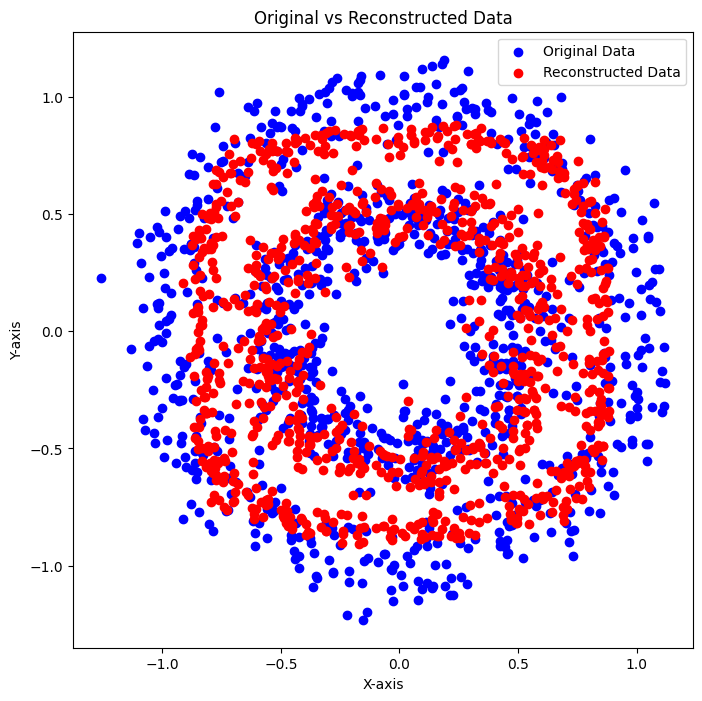

In [166]:
from sklearn.datasets import make_circles
from sklearn.metrics import mean_squared_error

def Autoencoder():
    input_layer = keras.Input(shape=(2,))
    
    # Encoder
    encoded = Dense(128, activation="tanh")(input_layer)
    encoded = Dense(2, activation="tanh")(encoded)
    
    # Decoder
    decoded = Dense(128, activation="tanh")(encoded)
    decoded = Dense(2, activation="tanh")(decoded)
    
    # Autoencoder model
    autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer="adam", loss="mse")
    return autoencoder

def train_autoencoder(autoencoder, data):
    autoencoder.fit(data, data, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    return autoencoder

def evaluate_autoencoder(autoencoder, data):
    reconstructed_data = autoencoder.predict(data)
    mse = mean_squared_error(data, reconstructed_data)
    return mse

def visualize_reconstructed_data(original_data, reconstructed_data):
    plt.figure(figsize=(8, 8))
    plt.scatter(original_data[:, 0], original_data[:, 1], c='blue', label='Original Data')
    plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c='red', label='Reconstructed Data')
    plt.title("Original vs Reconstructed Data")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()
def main():
    # Generate circular data
    dataset, labels = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

    # Train autoencoder
    autoencoder = Autoencoder()
    trained_autoencoder = train_autoencoder(autoencoder, dataset)

    # Evaluate autoencoder
    mse = evaluate_autoencoder(trained_autoencoder, dataset)
    print("Mean Squared Error for Autoencoder: ", mse)

    # Visualize reconstructed data
    reconstructed_data = trained_autoencoder.predict(dataset)
    visualize_reconstructed_data(dataset, reconstructed_data)

    
if __name__ == "__main__":
    main()


## Experiment 7

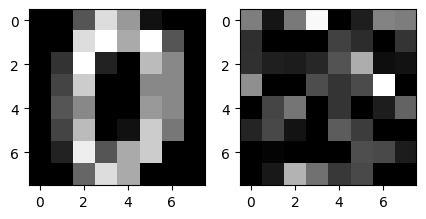

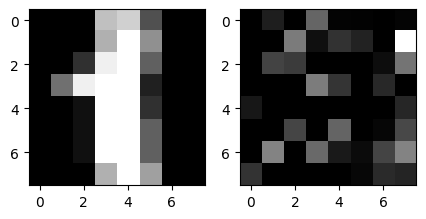

In [167]:
from sklearn.datasets import load_digits

def relu(x):
    return np.maximum(0, x)
    
def encoder(data, weight, bias):
    return relu(np.dot(data, weight) + bias)

def decoder(data, weight, bias):
    return relu(np.dot(data, weight) + bias)

def vae(data, encoder, decoder):
    input_dim = data.shape[0]
    hidden_dim = 4
    latent_dim = 2

    w1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.random.randn(hidden_dim)

    w_mu = np.random.randn(hidden_dim, latent_dim)
    b_mu = np.random.randn(latent_dim)

    w_logvar = np.random.randn(hidden_dim, latent_dim)
    b_logvar = np.random.randn(latent_dim)

    w3 = np.random.randn(latent_dim, hidden_dim)
    b3 = np.random.randn(hidden_dim)

    w4 = np.random.randn(hidden_dim, input_dim)
    b4 = np.random.randn(input_dim)

    # Forward pass

    z1 = encoder(data, w1, b1)
    mu = encoder(z1, w_mu, b_mu)
    logvar = encoder(z1, w_logvar, b_logvar)

    std = np.exp(0.5 * logvar)
    epsilon = np.random.randn(*std.shape)
    z = mu + epsilon * std

    z3 = decoder(z, w3, b3)
    x_hat = decoder(z3, w4, b4)

    return x_hat

data = load_digits()
x, y = data.data, data.target
for i in x[:2]:    
    reconstructed = vae(i, encoder, decoder)
    plt.figure(figsize=(5,10))
    
    plt.subplot(1,2,1)
    plt.imshow(i.reshape(8, 8), cmap="gray")
    
    
    plt.subplot(1, 2, 2) 
    plt.imshow(reconstructed.reshape(8, 8), cmap="gray")
    
    plt.show()


Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.7027 - val_loss: 0.6986
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6965 - val_loss: 0.7013
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6902 - val_loss: 0.6956
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6931 - val_loss: 0.6994
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6862 - val_loss: 0.7001
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6874 - val_loss: 0.6967
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6869 - val_loss: 0.7036
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6839 - val_loss: 0.7075
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6838 - val_loss: 0.6975
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6826 - val_loss: 0.7027
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6896 - val_loss: 0.7020
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6922 - val_loss: 0.7076
E

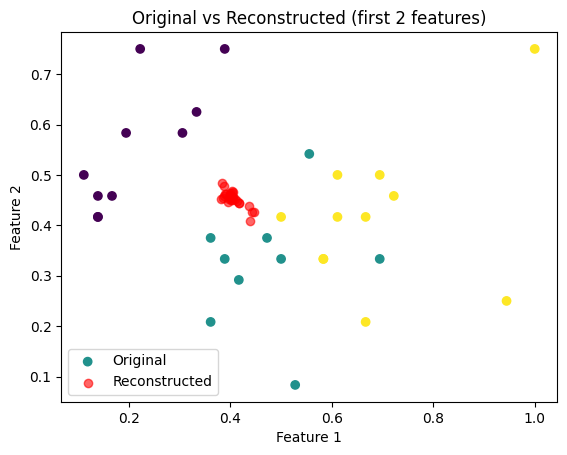

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load and scale the data
data = load_iris()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        mu, log_var = inputs
        epsilon = keras.backend.random_normal(shape=keras.backend.shape(mu))
        return mu + keras.backend.exp(0.5 * log_var) * epsilon


# Define VAE as a subclassed model
class VAE(keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = keras.Sequential([
            layers.InputLayer(input_shape=(input_dim,)),
            layers.Dense(128, activation="relu"),
            layers.Dense(64, activation="relu"),
        ])
        self.mu_layer = layers.Dense(latent_dim)
        self.log_var_layer = layers.Dense(latent_dim)
        self.sampling = Sampling()

        self.decoder = keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dense(input_dim, activation="sigmoid"),
        ])

    def call(self, inputs):
        x = self.encoder(inputs)
        mu = self.mu_layer(x)
        log_var = self.log_var_layer(x)
        z = self.sampling((mu, log_var))
        reconstruction = self.decoder(z)

        # Add KL divergence as loss
        kl_loss = -0.5 * keras.backend.sum(1 + log_var - keras.backend.square(mu) - keras.backend.exp(log_var), axis=1)
        self.add_loss(keras.backend.mean(kl_loss))

        return reconstruction


# Build and train model
input_dim = X_train.shape[1]
latent_dim = 2
vae = VAE(input_dim, latent_dim)
vae.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy())

vae.fit(X_train, X_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate
reconstructed = vae.predict(X_test)
mse = mean_squared_error(X_test, reconstructed)
print("Mean Squared Error for VAE:", mse)

# Plot original vs reconstructed (first 2 features)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Original')
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], c='red', label='Reconstructed', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Original vs Reconstructed (first 2 features)")
plt.show()

## Experiment 8

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def generator(data, weight):
    return np.dot(data, weight)

def discriminator(data, weight):
    return np.dot(data, weight)

def train_gan(data, epochs, generator=generator, discriminator=discriminator):
    learning_rate = 0.01
    latent_dim = 100
    data_dim = 2
    num_samples =1000
    batch_size = 32
    eps = 1e-8
    
    weights_g = np.random.normal(size=(latent_dim, data_dim))
    weights_d = np.random.normal(size=(data_dim, 1))
    print(weights_g.shape)
    for epoch in range(epochs):
        idx = np.random.randint(0, num_samples, batch_size)
        real_batch = data[idx]

        z = np.random.normal(size=(batch_size, latent_dim))
        fake_data = generator(z, weights_g)

        d_real = discriminator(real_batch, weights_d)
        d_fake = discriminator(fake_data, weights_d)

        sig_d_real = sigmoid(d_real)
        sig_d_fake = sigmoid(d_fake)

        d_loss_real = -np.mean(np.log(np.clip(sig_d_real, eps, 1 - eps)))
        d_loss_fake = -np.mean(np.log(np.clip(1 - sig_d_fake, eps, 1 - eps)))
        d_loss = d_loss_real + d_loss_fake

        grad_real = np.dot(real_batch.T, (sig_d_real - 1)) / batch_size
        grad_fake = np.dot(fake_data.T, sig_d_fake) / batch_size
        del_weights_d = grad_real + grad_fake
        weights_d -= learning_rate * del_weights_d

        g_loss = -np.mean(np.log(np.clip(sig_d_fake, eps, 1 - eps)))

        grad_g = np.dot(z.T, sig_d_fake) / batch_size
        weights_g -= learning_rate * grad_g

        if epoch % 100 == 0:
            print("Epoch: ", epoch, "G_loss: ", g_loss, "D_loss: ", d_loss)
    return weights_g, generator
num_samples = 1000
data_dim = 2
data = np.random.normal(loc=0, scale=1.0, size=(num_samples, data_dim))
data[:, 1] = -data[:, 0] # y = -x
weights_g , generator = train_gan(data, 10000)

(100, 2)
Epoch:  0 G_loss:  3.864848214050328 D_loss:  2.2502719212236157
Epoch:  100 G_loss:  0.6860975100397663 D_loss:  1.4039427934053046
Epoch:  200 G_loss:  0.6914498906079076 D_loss:  1.3914707127648032
Epoch:  300 G_loss:  0.6795174440946532 D_loss:  1.4060387719163714
Epoch:  400 G_loss:  0.7027738226362841 D_loss:  1.39319946546764
Epoch:  500 G_loss:  0.7153165472228527 D_loss:  1.3859684718203353
Epoch:  600 G_loss:  0.6977612891387567 D_loss:  1.3832682061213664
Epoch:  700 G_loss:  0.6956553743103089 D_loss:  1.383922947017517
Epoch:  800 G_loss:  0.683999380735203 D_loss:  1.402383023440236
Epoch:  900 G_loss:  0.6838979337705752 D_loss:  1.3957968299464545
Epoch:  1000 G_loss:  0.691932812472624 D_loss:  1.3886842287293688
Epoch:  1100 G_loss:  0.6840202422101751 D_loss:  1.4092772240719815
Epoch:  1200 G_loss:  0.6820170327625001 D_loss:  1.4076506729336449
Epoch:  1300 G_loss:  0.6859233522431512 D_loss:  1.3969157513579438
Epoch:  1400 G_loss:  0.6965899326701228 D_l

In [ ]:
sample_data = generator(np.random.normal(size=(1, 100)), weights_g)
print("Sample_data: ", sample_data)

Sample_data:  [[-3.06214753  3.80400616]]


In [186]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

def generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=latent_dim))
    model.add(Dense(784, activation='sigmoid'))
    model.add(Reshape((28, 28, 1)))
    return model

def discriminator():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model
def gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
latent_dim = 100
generator_model = generator(latent_dim)

discriminator_model = discriminator()
discriminator_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model = gan(generator_model, discriminator_model)
discriminator_model.trainable = False
gan_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

def train_gan(gan_model, generator_model, discriminator_model, x_train, epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(x_train.shape[0] // batch_size):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_images = generator_model.predict(noise)
            real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            d_loss_real = discriminator_model.train_on_batch(real_images, labels_real)
            d_loss_fake = discriminator_model.train_on_batch(generated_images, labels_fake)

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            labels_gan = np.ones((batch_size, 1))
            g_loss = gan_model.train_on_batch(noise, labels_gan)

        print(f"Epoch {epoch + 1}/{epochs}, D Loss: {d_loss_real[0]}, G Loss: {g_loss[0]}")
train_gan(gan_model, generator_model, discriminator_model, x_train, epochs=10, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weigh

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

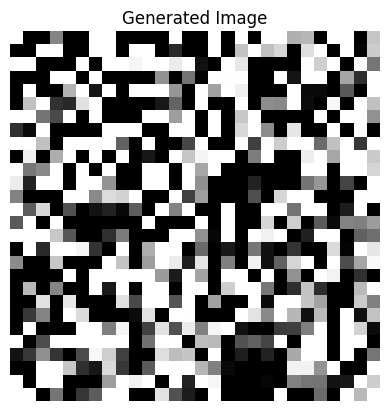

In [187]:
new_data = generator_model.predict(np.random.normal(0, 1, (10, latent_dim)))
plt.imshow(new_data[0].reshape(28, 28), cmap='gray')
plt.title("Generated Image")
plt.axis('off')